In [1]:
!pip install afinn

  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53449 sha256=d1b68fa6681021db7bb6395327a1ac075ad1ad7d9e1c7caedc6d949c1f08f523
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\f6\6f\c3\b305c5107a17618f2938a067d5ffcbb556909d82398762089e
Successfully built afinn


In [2]:
from sklearn.datasets import fetch_20newsgroups

In [3]:
newsdata= fetch_20newsgroups(subset='train')
newsdata.data[0]

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

In [67]:
afinn.score("<sos> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <unk> is an amazing actor and now the same being director <unk> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <unk> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <unk> to the two little boy's that played the <unk> of norman and paul they were just brilliant children are often left out of the <unk> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you think the whole story was so lovely because it was true and was someone's life after all that was shared with us all")

42.0

In [4]:
from afinn import Afinn

afinn=Afinn()
for i in range(10):
  print(afinn.scores(newsdata.data[i]))
  print(afinn.score(newsdata.data[i]))
  print()

[2, 2, 1, 2]
7.0

[2, 2, 1, 1, 2, 1, 2]
11.0

[-1, 2, -2, 2, 2, 3, 4, 3, 2, 1, 2, 2, -2, -2]
16.0

[-2, 1, 3, 2, -1, 2]
5.0

[1, -3, -1, -2, -2, -1, -3, -2, 1, -2, 1, -2, -3, -3, -1, -1]
-23.0

[-3, -2, 3, -3, -2, 2, -2, -3, -1, 2, 1, -3, 2, -3, -3, -1, -3, -3, -3]
-25.0

[-2, 2, 2, 2, 2, 3, -2]
7.0

[2, 1, -2, -2, 3, -2, 2, 1, 1, 1, -2, 2, -2]
3.0

[4, 2, 1, 4, 2, 2, 1]
16.0

[-2, -3, 1, -2, -2, -3, -1, -2, -2, 1, -1, -2, -2]
-20.0



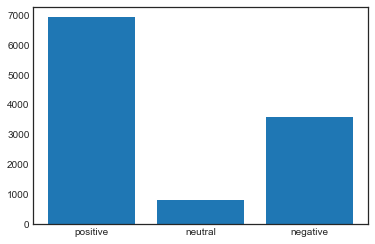

In [8]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
 
positive=0
neutral=0
negative=0

for i in newsdata.data:
    score=afinn.score(i)
    if score>0:
        positive +=1
    elif score ==0:
        neutral+=1
    else:
        negative+=1

plt.bar(np.arange(3), [positive, neutral, negative])
plt.xticks(np.arange(3),['positive','neutral','negative'])
plt.show()

In [ ]:
#콜랩에 메캅설치

In [15]:
! git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git

Cloning into 'Mecab-ko-for-Google-Colab'...


In [16]:
cd Mecab-ko-for-Google-Colab/

C:\Users\USER\Mecab-ko-for-Google-Colab\Mecab-ko-for-Google-Colab


In [18]:
!bash install_mecab-ko_on_colab190912.sh

L i n u x ㈕  W i n d o w s   X��  堡ㅒ\桔�  0쇱� �  $햆�눼�  댤읠  J킵쪘꿜�. 
 
 
 D힀톇�  M i c r o s o f t   S t o r e 斤�  0쇱�|�  $햆�`�  �  댤돠황我. 
 
 
 h t t p s : / / a k a . m s / w s l s t o r e 
 
 
 


In [1]:
import re
import urllib.request
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import eunjeon

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [20]:
train_file= urllib.request.urlopen('https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt')
test_file=urllib.request.urlopen('https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt')

train_data=pd.read_table(train_file)
test_data=pd.read_table(test_file)
train_data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [21]:
print(train_data['document'].nunique())
print(train_data['label'].unique())

146182
[0 1]


In [22]:
train_data.drop_duplicates(subset=['document'],inplace=True)

print(train_data['document'].nunique())

146182


In [23]:
print(train_data.isnull().sum())

train_data= train_data.dropna(how='any')

id          0
document    1
label       0
dtype: int64


In [24]:
train_data['document']=train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "")
train_data[:10]

<ipython-input-24-55ea390784df>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['document']=train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "")


,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...,1
5,5403919,막 걸음마 뗀 세부터 초등학교 학년생인 살용영화ㅋㅋㅋ별반개도 아까움,0
6,7797314,원작의 긴장감을 제대로 살려내지못했다,0
7,9443947,별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지정말 발로해도 그것보단 낫...,0
8,7156791,액션이 없는데도 재미 있는 몇안되는 영화,1
9,5912145,왜케 평점이 낮은건데 꽤 볼만한데 헐리우드식 화려함에만 너무 길들여져 있나,1


In [29]:
train_data['document'].replace('',np.nan, inplace=True)
print(len(train_data))
print(train_data.isnull().sum())

146182
id            0
document    391
label         0
dtype: int64


In [30]:
train_data= train_data.dropna(how='any')
print(len(train_data))

145791


In [31]:
test_data.drop_duplicates(subset=['document'],inplace=True)
test_data['document']= test_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "")
test_data['document'].replace('',np.nan, inplace=True)
test_data= test_data.dropna(how='any')

<ipython-input-31-80831bf8d09b>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  test_data['document']= test_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "")


In [32]:
stopwords=['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [33]:
mecab=eunjeon.Mecab()

In [34]:
X_train=[]
for sentence in train_data['document']:
  X_train.append([word for word in mecab.morphs(sentence)if word not in stopwords])

In [35]:
print(X_train[:2])

[['아', '더', '빙', '진짜', '짜증', '나', '네요', '목소리'], ['흠', '포스터', '보고', '초딩', '영화', '줄', '오버', '연기', '조차', '가볍', '지', '않', '구나']]


In [36]:
X_test=[]
for sentence in test_data['document']:
  X_test.append([word for word in sentence if not word in stopwords])

In [ ]:
print(X_test[:2])

[['굳', ' ', 'ㅋ'], ['뭐', '야', ' ', ' ', '평', '점', ' ', '나', '쁘', '진', ' ', '않', '지', '만', ' ', '점', ' ', '짜', '리', ' ', '더', '더', '욱', ' ', '아', '니', '잖', '아']]


In [38]:
tokenizer= Tokenizer()
tokenizer.fit_on_texts(X_train)
print(tokenizer.word_index)

{'영화': 1, '다': 2, '고': 3, '하': 4, '을': 5, '보': 6, '게': 7, '지': 8, '있': 9, '없': 10, '좋': 11, '나': 12, '었': 13, '만': 14, '는데': 15, '너무': 16, '봤': 17, '안': 18, '적': 19, '로': 20, '정말': 21, '것': 22, '음': 23, '아': 24, '네요': 25, '어': 26, '지만': 27, '재밌': 28, '같': 29, '진짜': 30, '했': 31, '에서': 32, '기': 33, '네': 34, '점': 35, '않': 36, '거': 37, '았': 38, '수': 39, '되': 40, '면': 41, 'ㅋㅋ': 42, '인': 43, '말': 44, '연기': 45, '주': 46, '최고': 47, '평점': 48, '내': 49, '이런': 50, '던': 51, '생각': 52, '어요': 53, '할': 54, '왜': 55, '겠': 56, '스토리': 57, '해': 58, 'ㅋㅋㅋ': 59, '습니다': 60, '듯': 61, '아니': 62, '드라마': 63, '그': 64, '싶': 65, '사람': 66, '더': 67, '함': 68, '때': 69, '감동': 70, '배우': 71, '본': 72, '까지': 73, '보다': 74, '뭐': 75, '볼': 76, '알': 77, '만들': 78, '내용': 79, '지루': 80, '감독': 81, '라': 82, '그냥': 83, '재미': 84, '시간': 85, '재미있': 86, '중': 87, '였': 88, '년': 89, '잼': 90, '사랑': 91, '못': 92, '재미없': 93, '냐': 94, '쓰레기': 95, '서': 96, '니': 97, '라고': 98, '면서': 99, '다시': 100, '나오': 101, '하나': 102, '번': 103, '야': 104, '작품': 105, '이거': 1

In [39]:
threshold=3
words_cnt=len(tokenizer.word_index)
rare_cnt=0
words_freq=0
rare_freq=0

for key, value in tokenizer.word_counts.items():
  words_freq=words_freq+ value

  if value< threshold:
    rare_cnt +=1
    rare_freq= rare_freq+ value

print('전체 단어 수 :{}'.format(words_cnt))
print(f'빈도가 {threshold-1} 이하인 단어 수 : {rare_cnt}')
print('희귀 단어 비율: {}%'.format(round((rare_cnt/words_cnt)*100)))
print('희귀 단어 등장 빈도 비율: {}'.format(round((rare_freq/words_freq)*100))) 

전체 단어 수 :49590
빈도가 2 이하인 단어 수 : 28110
희귀 단어 비율: 57%
희귀 단어 등장 빈도 비율: 2


In [40]:
vocab_size= words_cnt- rare_cnt +2
print(vocab_size)

21482


In [41]:
tokenizer=Tokenizer(vocab_size, oov_token='OOV')
tokenizer.fit_on_texts(X_train)
X_train= tokenizer.texts_to_sequences(X_train)
X_test=tokenizer.texts_to_sequences(X_test)

In [42]:
y_train= np.array(train_data['label'])
y_test=np.array(test_data['label'])

In [43]:
drop_train=[index for index, sentence in enumerate(X_train) if len(sentence)<1]

X_train=np.delete(X_train, drop_train, axis=0)
y_train=np.delete(y_train, drop_train, axis=0)

print(len(X_train))
print(len(y_train))

145380
145380


C:\Users\USER\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [44]:
print('리뷰 최대 길이: ', max(len(l) for l in X_train))
print('리뷰 평균 길이:', sum(map(len, X_train))/len(X_train))

리뷰 최대 길이:  83
리뷰 평균 길이: 13.805839867932315


In [ ]:
sum(map(len,[[1,2,3],[2],[1,2,3,4,5]]))/len([1,2,3])

3.0

In [46]:
sum(map(len,[[1],[1,2,3],[2,5]]))

6

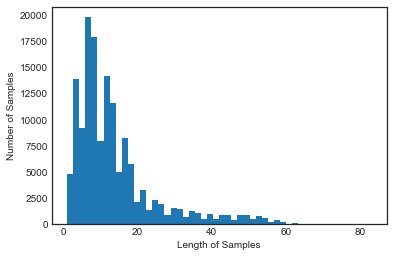

In [47]:
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('Length of Samples')
plt.ylabel('Number of Samples')
plt.show()

In [48]:
max_len=60

In [49]:
X_train = pad_sequences(X_train, maxlen=max_len)
X_test=pad_sequences(X_test, maxlen=max_len)

In [2]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential

In [51]:
model= Sequential()
model.add(Embedding(vocab_size, 100))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics='accuracy')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         2148200   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               117248    
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 2,265,577
Trainable params: 2,265,577
Non-trainable params: 0
_________________________________________________________________


In [52]:
history= model.fit(X_train, y_train, epochs=5, batch_size=60, validation_split=0.2 )

Epoch 1/5
1939/1939 [==============================] - 121s 62ms/step - loss: 0.3888 - accuracy: 0.8235 - val_loss: 0.3455 - val_accuracy: 0.8459
Epoch 2/5
1939/1939 [==============================] - 117s 61ms/step - loss: 0.3183 - accuracy: 0.8628 - val_loss: 0.3251 - val_accuracy: 0.8581
Epoch 3/5
1939/1939 [==============================] - 120s 62ms/step - loss: 0.2912 - accuracy: 0.8780 - val_loss: 0.3157 - val_accuracy: 0.8641
Epoch 4/5
1939/1939 [==============================] - 118s 61ms/step - loss: 0.2711 - accuracy: 0.8880 - val_loss: 0.3136 - val_accuracy: 0.8639
Epoch 5/5
1939/1939 [==============================] - 121s 63ms/step - loss: 0.2546 - accuracy: 0.8959 - val_loss: 0.3170 - val_accuracy: 0.8656


In [54]:
model.evaluate(X_test, y_test)

1532/1532 [==============================] - 21s 14ms/step - loss: 0.7081 - accuracy: 0.6642


[0.7080578804016113, 0.6641902327537537]

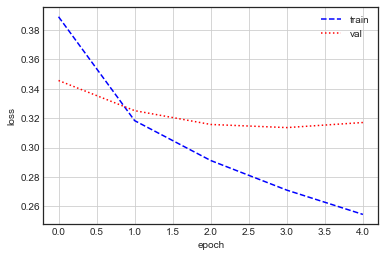

In [68]:
hist_dict=history.history
loss= hist_dict['loss']
val_loss=hist_dict['val_loss']
acc=hist_dict['accuracy']
# val_acc=hist_dict['val_acc']

plt.plot(loss,'b--')
plt.plot(val_loss,'r:')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.grid()
plt.show()

In [71]:
def sentiment_predict(new_sentence):
    new_token= [word for word in mecab.morphs(new_sentence) if word not in stopwords]
    new_sequences= tokenizer.texts_to_sequences([new_token])
    new_pad= pad_sequences(new_sequences, maxlen=max_len)
    score= float(model.predict(new_pad))

    if score > 0.65:
        print('{} > 긍정 ({:.2f}%)'.format(new_sentence, score*100))

    elif score<=0.65 and score>=0.45:
        print('{} > 중립 ({:.2f}%)'.format(new_sentence, (score)*100))

    else:
        print('{} > 부정 ({:.2f}%)'.format(new_sentence, (1-score)*100))

In [72]:
sentiment_predict('너는 참 이쁜 말만 하는구나?')
sentiment_predict('고마워요')

너는 참 이쁜 말만 하는구나? > 부정 (60.85%)
고마워요 > 긍정 (87.71%)


In [87]:
sentiment_predict('정연재')

정연재 > 긍정 (84.26%)


In [74]:
sentiment_predict('인스타 추천서비스를 어떻게 생각하세요?')

인스타 추천서비스를 어떻게 생각하세요? > 중립 (51.82%)


In [75]:
sentiment_predict('어떻게 이렇게 지루하고 재미없죠?')

어떻게 이렇게 지루하고 재미없죠? > 부정 (99.74%)


In [3]:
urllib.request.urlretrieve('https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/naver_shopping.txt', filename='shopping.txt')

('shopping.txt', <http.client.HTTPMessage at 0x265aa5c8a60>)

In [4]:
total_data= pd.read_table('shopping.txt', names=['ratings', 'reviews'])
print(len(total_data))

200000


In [5]:
total_data[:10]

,ratings,reviews
0,5,배공빠르고 굿
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ
5,2,비추합니다 계란 뒤집을 때 완전 불편해요 ㅠㅠ 코팅도 묻어나고 보기엔 예쁘고 실용적...
6,1,주문을 11월6에 시켰는데 11월16일에 배송이 왔네요 ㅎㅎㅎ 여기 회사측과는 전화...
7,2,넉넉한 길이로 주문했는데도 안 맞네요 별로예요
8,2,보폴이 계속 때처럼 나오다가 지금은 안나네요~
9,2,110인데 전문속옷브랜드 위생팬티105보다 작은듯해요. 불편해요. 밴딩부분이 다 신...


In [6]:

total_data['label']=np.select([total_data.ratings ==5,total_data.ratings ==4,total_data.ratings ==2,total_data.ratings ==1],[2,2,1,0], default=0)

In [7]:
total_data[:20]

,ratings,reviews,label
0,5,배공빠르고 굿,2
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고,1
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...,2
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...,1
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ,2
5,2,비추합니다 계란 뒤집을 때 완전 불편해요 ㅠㅠ 코팅도 묻어나고 보기엔 예쁘고 실용적...,1
6,1,주문을 11월6에 시켰는데 11월16일에 배송이 왔네요 ㅎㅎㅎ 여기 회사측과는 전화...,0
7,2,넉넉한 길이로 주문했는데도 안 맞네요 별로예요,1
8,2,보폴이 계속 때처럼 나오다가 지금은 안나네요~,1
9,2,110인데 전문속옷브랜드 위생팬티105보다 작은듯해요. 불편해요. 밴딩부분이 다 신...,1


In [8]:
total_data['ratings'].nunique(), total_data['reviews'].nunique(),total_data['label'].nunique()

(4, 199908, 3)

In [9]:
total_data.drop_duplicates(subset=['reviews'], inplace= True)
print(len(total_data))

199908


In [11]:
from sklearn.model_selection import train_test_split

train_data, test_data= train_test_split(total_data, test_size=0.25,random_state=111)
print(len(train_data))
print(len(test_data))

149931
49977


<AxesSubplot:>

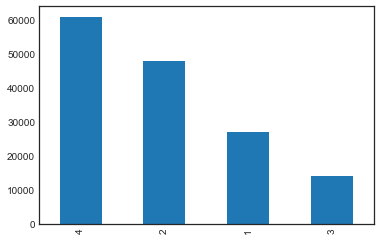

In [114]:
train_data['label'].value_counts().plot(kind='bar')

In [12]:
train_data.groupby('label').size().reset_index(name='count')

,label,count
0,0,27034
1,1,47940
2,2,74957


In [13]:
train_data['reviews']=train_data['reviews'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]', "")
train_data['reviews'].replace('',np.nan, inplace=True)
print(len(train_data))

<ipython-input-13-5c114884d20a>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['reviews']=train_data['reviews'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]', "")


149931


<ipython-input-13-5c114884d20a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['reviews']=train_data['reviews'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]', "")
C:\Users\USER\anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [14]:
test_data.drop_duplicates(subset=['reviews'],inplace=True)
test_data['reviews']=test_data['reviews'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]', "")
test_data['reviews'].replace('',np.nan, inplace=True)
print(len(test_data))

49977


<ipython-input-14-ef757ca21d42>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.drop_duplicates(subset=['reviews'],inplace=True)
<ipython-input-14-ef757ca21d42>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  test_data['reviews']=test_data['reviews'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]', "")
<ipython-input-14-ef757ca21d42>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['reviews']=test_data['reviews'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]', "")


In [15]:
stopwords=['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게']

In [17]:
mecab=eunjeon.Mecab()
train_data['reviews']=train_data['reviews'].apply(mecab.morphs)
train_data['reviews']=train_data['reviews'].apply(lambda x:[item for item in x if item not in stopwords])

<ipython-input-17-cc09dcfe7cba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['reviews']=train_data['reviews'].apply(mecab.morphs)
<ipython-input-17-cc09dcfe7cba>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['reviews']=train_data['reviews'].apply(lambda x:[item for item in x if item not in stopwords])


In [18]:
test_data['reviews'].apply(mecab.morphs)
test_data['reviews'].apply(lambda x:[item for item in x if item not in stopwords])

125929    [배, 송,  , 빠, 르, 요,  , 제, 품,  , 여, 러, 번,  , 쓰, ...
26487     [워, 셔, 액,  , 터, 넷,  , 첫,  , 구, 매, 데,  , 만, 족, ...
138544    [정, 배, 송,  , 당, 일, 날,  , 오,  , 배, 송, 기, 사, 님, ...
90778     [조, 아, 요,  , ㄷ, ㅅ, ㄷ, ㅅ, ㅅ, ㄱ, ㄷ, ㅅ, ㄷ, ㅅ, ㄴ, ...
190911           [짱, 예, 요,  , 렇,  , 많,  , 줄,  , 몰, 랏, 어, 욤]
                                ...                        
104532    [밤,  , 기, 저, 귀, 로,  , 썼, 데,  , 매, 번,  , 오, 줌, ...
143747              [유, 리,  , 두, 툼,  , 튼, 튼, 해,  , 보, 입, 니]
105169                    [배, 송,  , 빠, 르,  , 교, 체,  , 쉽, 요]
126180    [좋, 어, 요,  , 처, 음,  , 너, 무,  , 딱, 딱, 했, 데,  , ...
156041    [좋, 습, 니,  , 누, 벼, 진,  , 차, 렵, 싫, 어, 서,  , 찾, ...
Name: reviews, Length: 49977, dtype: object

In [19]:
X_train= train_data['reviews'].values
y_train=train_data['label'].values
X_test= test_data['reviews'].values
y_test= test_data['label'].values

print(X_test.shape)
print(y_test.shape)
print(X_train.shape)
print(y_train.shape)

(49977,)
(49977,)
(149931,)
(149931,)


In [20]:
tokenizer= Tokenizer() 
tokenizer.fit_on_texts(X_train)

In [21]:
threshold=3
words_cnt = len(tokenizer.word_index)
rare_cnt=0
words_freq=0
rare_freq=0

for key, value in tokenizer.word_counts.items():
  words_freq= words_freq+value

  if value < threshold:
    rare_cnt +=1
    rare_freq = rare_freq + value
print('전체 단어 수 :', words_cnt)
print('빈도가 {} 이하인 희귀 단어 수 : {}.'.format(threshold-1, rare_cnt))
print('희귀 단어 비율 : {}'.format((rare_cnt/words_cnt)*100))
print('희귀 단어 등장 빈도 비율 {}'.format((rare_freq/words_freq)*100))

전체 단어 수 : 39733
빈도가 2 이하인 희귀 단어 수 : 22902.
희귀 단어 비율 : 57.63974529987668
희귀 단어 등장 빈도 비율 1.2105580649176668


In [22]:
vocab_size= words_cnt-rare_cnt+2
print(vocab_size)

16833


In [23]:
tokenizer =Tokenizer(vocab_size, oov_token= 'OOV')
tokenizer.fit_on_texts(X_train)
X_train= tokenizer.texts_to_sequences(X_train)
X_test= tokenizer.texts_to_sequences(X_test)

In [24]:
print(X_train[:2])

[[5406, 3, 258, 15, 1424, 101], [86, 108, 265, 98, 10, 26, 17, 2, 601, 275, 210, 581, 1541, 3179, 1571, 344, 209, 261, 548, 799, 1212, 80, 37, 147, 137, 5557, 1611, 98, 539, 51, 57, 5063, 2, 76]]


In [25]:
print(X_test[:2])

[[1, 1, 1, 1, 1, 4604, 1], [1, 732, 733, 1, 1, 1, 85]]


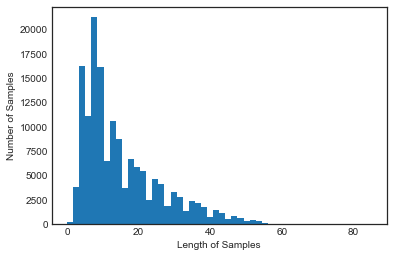

In [26]:
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('Length of Samples')
plt.ylabel('Number of Samples')
plt.show()

In [27]:
max_len= 60

In [28]:
X_train= pad_sequences(X_train, maxlen=max_len)
X_test= pad_sequences(X_test, maxlen=max_len)

In [29]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Embedding, Dense, GRU
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [48]:
np.array(y_train[0])

array(2)

In [50]:
import numpy as np
y_train = [] 
y_test = [] 
for i in range(len(train_data['label'])): 
    if train_data['label'].iloc[i] == 2: 
        y_train.append([0, 0, 1]) 
    elif train_data['label'].iloc[i] == 1: 
        y_train.append([0, 1, 0]) 
    elif train_data['label'].iloc[i] == 0: 
        y_train.append([1, 0, 0]) 

for i in range(len(test_data['label'])): 
    if test_data['label'].iloc[i] ==2: 
        y_test.append([0, 0, 1]) 
    elif test_data['label'].iloc[i] == 1: 
        y_test.append([0, 1, 0]) 
    elif test_data['label'].iloc[i] ==0: 
        y_test.append([1, 0, 0]) 
            
y_train = np.array(y_train) 
y_test = np.array(y_test)


In [53]:
from keras.layers import Embedding, Dense, LSTM 
from keras.models import Sequential 
from keras.preprocessing.sequence import pad_sequences 
max_len = 20  
X_train = pad_sequences(X_train, maxlen=max_len) 
X_test = pad_sequences(X_test, maxlen=max_len)

In [56]:
model= Sequential()
model.add(Embedding(vocab_size, 100))
model.add(LSTM(128))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
history= model.fit(X_train, y_train, epochs=12, batch_size=10, validation_split=0.1)

Epoch 1/12
13494/13494 [==============================] - 287s 20ms/step - loss: 0.6271 - acc: 0.7202 - val_loss: 0.5458 - val_acc: 0.7528
Epoch 2/12
13494/13494 [==============================] - 266s 20ms/step - loss: 0.4983 - acc: 0.7825 - val_loss: 0.5385 - val_acc: 0.7600
Epoch 3/12
13494/13494 [==============================] - 264s 20ms/step - loss: 0.4462 - acc: 0.8100 - val_loss: 0.5455 - val_acc: 0.7553
Epoch 4/12
13494/13494 [==============================] - 265s 20ms/step - loss: 0.3955 - acc: 0.8348 - val_loss: 0.5918 - val_acc: 0.7406
Epoch 5/12
13494/13494 [==============================] - 268s 20ms/step - loss: 0.3426 - acc: 0.8585 - val_loss: 0.6333 - val_acc: 0.7382
Epoch 6/12
13494/13494 [==============================] - 266s 20ms/step - loss: 0.2893 - acc: 0.8836 - val_loss: 0.7480 - val_acc: 0.7262
Epoch 7/12
13494/13494 [==============================] - 265s 20ms/step - loss: 0.2343 - acc: 0.9078 - val_loss: 0.8087 - val_acc: 0.7254
Epoch 8/12
13494/13494 [===

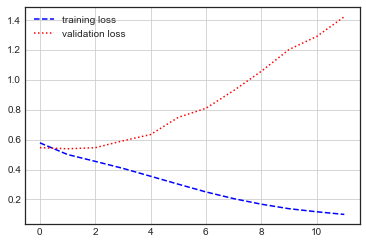

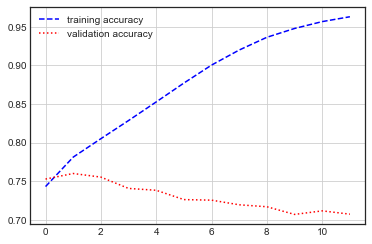

In [57]:
hist_dict=history.history
loss= hist_dict['loss']
val_loss=hist_dict['val_loss']
acc=hist_dict['acc']
val_acc=hist_dict['val_acc']

plt.plot(loss, 'b--', label='training loss')
plt.plot(val_loss, 'r:', label='validation loss')
plt.legend()
plt.grid()

plt.figure()
plt.plot(acc, 'b--', label='training accuracy')
plt.plot(val_acc,'r:', label='validation accuracy')
plt.legend()
plt.grid()
plt.show()

In [172]:
loaded_model= load_model('best_model.h5')
loaded_model.evaluate(X_test, y_test, batch_size=32)

1562/1562 [==============================] - 30s 18ms/step - loss: 1.1585 - acc: 0.4583


[1.1585074663162231, 0.4582507908344269]

In [65]:
predict = model.predict(X_test)

import numpy as np 
predict_labels = np.argmax(predict, axis=1) 
original_labels = np.argmax(y_test, axis=1)
for i in range(len(x)): 
    print(  x[i], "/\t 원래 라벨 : ", original_labels[i], "/\t예측한 라벨 : ", predict_labels[i])



처음 써봤는데 대박 좋아요 /	 원래 라벨 :  1 /	예측한 라벨 :  1
영어는 영어다. /	 원래 라벨 :  2 /	예측한 라벨 :  2
그런일이 있었나요? /	 원래 라벨 :  2 /	예측한 라벨 :  1
상식적으로 말이 안됩니다. /	 원래 라벨 :  2 /	예측한 라벨 :  2
소소하네요. /	 원래 라벨 :  2 /	예측한 라벨 :  0
6시에 퇴근합니다. /	 원래 라벨 :  1 /	예측한 라벨 :  1


In [60]:

x=['처음 써봤는데 대박 좋아요','영어는 영어다.', '그런일이 있었나요?', '상식적으로 말이 안됩니다.','소소하네요.','6시에 퇴근합니다.']

In [215]:
def solu(text):
    return re.sub('[\s]','',text)

In [216]:
text='english2가 영어보다 어렵나요?'
solu(text)

'english2가영어보다어렵나요?'